# Pokemon

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Pokemon.csv')

In [5]:
data.head()

,SN,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 0 to 799
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SN           414 non-null    int64 
 1   Name         414 non-null    object
 2   Type 1       414 non-null    object
 3   Type 2       414 non-null    object
 4   HP           414 non-null    int64 
 5   Attack       414 non-null    int64 
 6   Defense      414 non-null    int64 
 7   Sp. Attack   414 non-null    int64 
 8   Sp. Defense  414 non-null    int64 
 9   Speed        414 non-null    int64 
 10  Generation   414 non-null    int64 
 11  Legendary    414 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 39.2+ KB


In [3]:
# Data Preprocessing
# Drop rows with missing values
data = data.dropna()

In [6]:
# Encode categorical features
label_encoder = LabelEncoder()
data['Type 1'] = label_encoder.fit_transform(data['Type 1'])
data['Type 2'] = label_encoder.fit_transform(data['Type 2'])
data['Legendary'] = label_encoder.fit_transform(data['Legendary'])

In [7]:
# Define features and target variable
X = data.drop(['SN', 'Name', 'Legendary'], axis=1)
y = data['Legendary']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.93
Precision: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        74
           1       0.80      0.44      0.57         9

    accuracy                           0.93        83
   macro avg       0.87      0.72      0.77        83
weighted avg       0.92      0.93      0.92        83



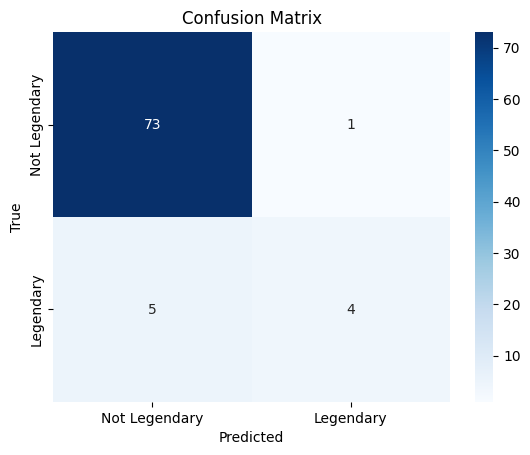

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Legendary', 'Legendary'], yticklabels=['Not Legendary', 'Legendary'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

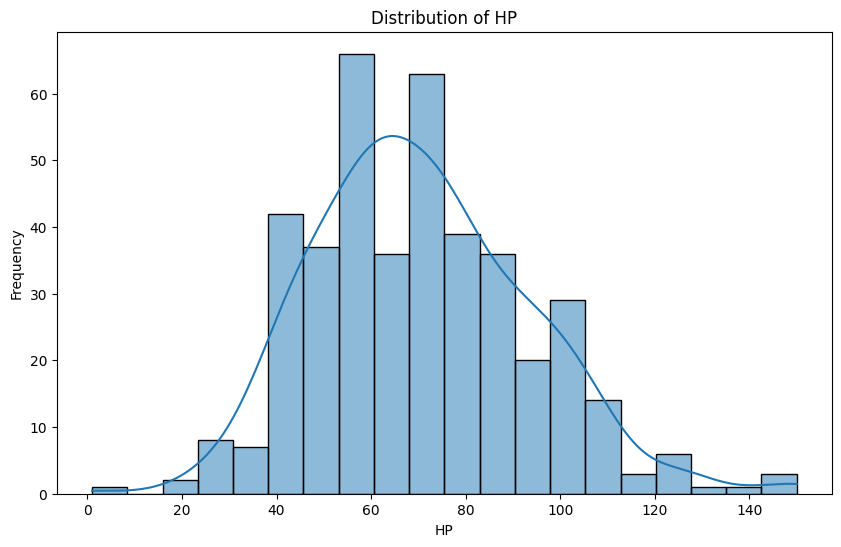

In [13]:
# Histogram for HP Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['HP'], kde=True, bins=20)
plt.title('Distribution of HP')
plt.xlabel('HP')
plt.ylabel('Frequency')
plt.show()

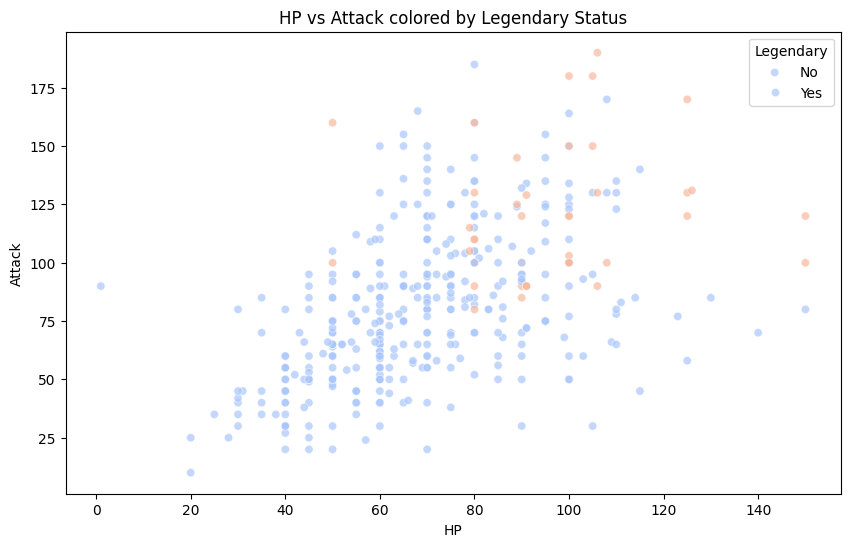

In [14]:
# Scatter Plot of two features (e.g., 'HP' vs 'Attack') colored by 'Legendary' status
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['HP'], y=data['Attack'], hue=data['Legendary'], palette='coolwarm', alpha=0.7)
plt.title('HP vs Attack colored by Legendary Status')
plt.xlabel('HP')
plt.ylabel('Attack')
plt.legend(title='Legendary', labels=['No', 'Yes'])
plt.show()